In [5]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [2]:
d = 'ELife/FinalDI/sab'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)

In [12]:
m = build.Model(data=redata,kind='xsab', dynamic='hyp', tb=.650, depends_on={'v':'Cond'})

In [8]:
sab_inits={'a': array([ 0.53625]), 'xb': array([ 0.87761]), 'ssv': -0.98396462152356978, 'tr': array([ 0.17801]), 'v': array([ 1.26793])}

In [10]:
m = build.Model(data=redata, inits=sab_inits, kind='xsab', dynamic='hyp', tb=.650, depends_on={'v':'Cond'})

m.flat_y=m.avg_y[0]
m.flat_wts=m.avg_wts.reshape(2,16)[0]

m.make_optimizer(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)
opt=m.opt

opt.flat_y=m.avg_y[0]
opt.flat_wts=m.avg_wts.reshape(2,16)[0]
opt.fitparams['flat_y']=m.avg_y[0]
opt.fitparams['flat_wts']=m.avg_wts.reshape(2,16)[0]

In [21]:
m.flat_fitinfo

a           0.53428
chi       0.0028029
cnvrg          True
ndata            16
nfev            145
nvary             5
ssv        -0.98956
tr          0.17354
v            1.2663
xb           0.8785
df               11
rchi     0.00025481
logp         -132.4
AIC          -122.4
BIC         -128.02
dtype: object

In [20]:
m.optimize(stage='flat', multiopt=True, inits=sab_inits, y=m.avg_y[0])

basinhopping step 0: f 0.00496816
basinhopping step 1: f 0.00473603 trial_f 0.00473603 accepted 1  lowest_f 0.00473603
found new global minimum on step 1 with function value 0.00473603
basinhopping step 2: f 0.00473603 trial_f 0.413387 accepted 0  lowest_f 0.00473603
basinhopping step 3: f 0.0500886 trial_f 0.0500886 accepted 1  lowest_f 0.00473603
basinhopping step 4: f 0.009361 trial_f 0.009361 accepted 1  lowest_f 0.00473603
basinhopping step 5: f 0.0256694 trial_f 0.0256694 accepted 1  lowest_f 0.00473603
basinhopping step 6: f 0.00257505 trial_f 0.00257505 accepted 1  lowest_f 0.00257505
found new global minimum on step 6 with function value 0.00257505
basinhopping step 7: f 0.00672984 trial_f 0.00672984 accepted 1  lowest_f 0.00257505
basinhopping step 8: f 0.108029 trial_f 0.108029 accepted 1  lowest_f 0.00257505
basinhopping step 9: f 1.05547 trial_f 1.05547 accepted 1  lowest_f 0.00257505
adaptive stepsize: acceptance rate 0.800000 target 0.500000 new stepsize 0.0555556 old st

In [25]:
m.avg_y[0]

array([ 0.94201,  0.99426,  0.98279,  0.89672,  0.50492,  0.10328,
        0.51263,  0.54257,  0.56297,  0.58212,  0.61031,  0.49795,
        0.52919,  0.54817,  0.56757,  0.59428])

In [9]:
xiact = array([ 0.9898 ,  1.     ,  0.998  ,  0.947  ,  0.478  ,  0.107  ,
        0.50558,  0.52958,  0.54858,  0.56858,  0.59958,  0.49258,
        0.51858,  0.53158,  0.54466,  0.57458])

In [10]:
xsab = array([ 0.963  ,  1.     ,  0.999  ,  0.9184 ,  0.4806 ,  0.1294 ,
        0.52054,  0.54754,  0.56654,  0.58754,  0.61554,  0.51054,
        0.53754,  0.55454,  0.57354,  0.60054])

In [8]:
xirace = array([ 0.9926 ,  0.999  ,  0.9826 ,  0.872  ,  0.513  ,  0.1574 ,
        0.50605,  0.53005,  0.54705,  0.56705,  0.59405,  0.49805,
        0.51805,  0.53405,  0.54905,  0.57205])

In [16]:
yhats = [xsab, xirace, xiact]
savestrings = ['DPM', 'Ind-RM', 'Int-RM']
colors = ['#4168B7',"#e74c3c", "#e67e22", "#16a085",'#386346','#4168B7', "#e74c3c", "#e67e22"]
#colors = ['#192aa4',"#c73a23", "#078002", "#e74c3c", "#16a085"]
colors=["#1e8449","#ca4440",'#3237be']

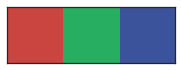

In [186]:
sns.palplot(colors)

In [14]:
from radd.toolbox import analyze

In [28]:
sc, cq, eq = vis.unpack_yvector(m.avg_y[0])
data_kde = [analyze.kde_fit_quantiles(q, bw=.1) for q in [cq, eq]]

In [29]:
sclist = [sc]

In [ ]:
f, axes = plt.subplots(1,3,figsize=(11, 4))

In [ ]:
sns.distplot(hi)

In [134]:
colors

['#284f95', '#869528', '#e74c3c', '#16a085']

In [33]:
colors=["#299270","#c73a23",'#354bba']

In [30]:
yhats = [xsab, xirace, xiact]
for yh in yhats:
      sclist.append(vis.unpack_yvector(yh)[0])
yerr = array([ 0.00464,  0.01022,  0.02878,  0.0636 ,  0.03038])

In [31]:
sclist

[array([ 0.99426,  0.98279,  0.89672,  0.50492,  0.10328]),
 array([ 1.    ,  0.999 ,  0.9184,  0.4806,  0.1294]),
 array([ 0.999 ,  0.9826,  0.872 ,  0.513 ,  0.1574]),
 array([ 1.   ,  0.998,  0.947,  0.478,  0.107])]

In [35]:
savestrings = ['DPM', 'Ind-RM', 'Int-RM']
vis.scurves(sclist, kind='radd', yerr=yerr, labels=['Baseline']+savestrings, linestyles=['-']+['-']*3, colors=['#333333']+colors)
plt.savefig(pth+'resc.svg', rasterized=True)

In [ ]:
sclist = [sc]

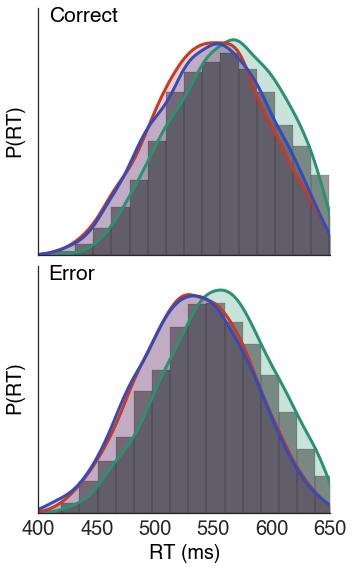

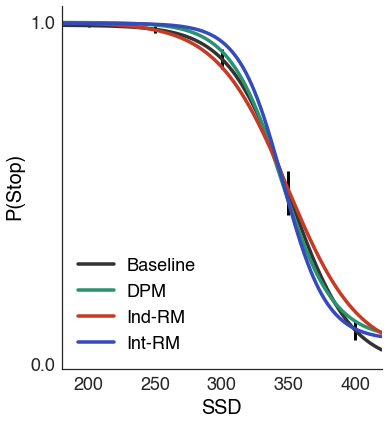

In [243]:
f, axes = plt.subplots(2,1,figsize=(5, 8))
colors=["#299270","#c73a23",'#354bba']
yhats = [xsab, xirace, xiact]
savestrings = ['DPM', 'Ind-RM', 'Int-RM']
data_kde = data_kde
axes_x, pp = vis.plot_data_dists(data=data_kde, cdf=False, axes=axes, data_type='interpolated')
#axes_x, pp = vis.plot_data_dists(data=redata, cdf=False, axes=axes)
sclist = [sc]
for i, yhat in enumerate(yhats):
      sns.set_context('notebook', font_scale=2)
      
      fitsc, fitcq, fiteq = vis.unpack_yvector(yhat)
      ax1, ax2 = axes_x
      fit_cq, fit_eq = [analyze.kde_fit_quantiles(q, bw=.1) for q in [fitcq, fiteq]]

      sns.kdeplot(fit_cq, color=colors[i], bw=.01, ax=ax1, clip=(0.4, .650), linewidth=3, shade=True)#, shade=True)      
      sns.kdeplot(fit_eq, color=colors[i], bw=.01, ax=ax2, clip=(0.4, .650), linewidth=3, shade=True)#, shade=True)
      sclist.append(fitsc)
      sns.despine()
for ax in [ax1, ax2]:
      if ax.is_last_col():
            continue
      
      if ax.is_first_col():
            ax.set_ylabel('P(RT)')
      ax.set_xlabel('RT (ms)')
      ax.set_xticklabels([int(xx) for xx in ax.get_xticks()*1000])
      ax.set_ylim(0,9)
      sns.despine()
sns.set_context('notebook', font_scale=2)
ax1.set_xlim(.4, .65)
ax2.set_xlim(.4, .65)
ax1.text(.41, 8.5, 'Correct', fontsize=21)
ax2.text(.41, 8.5, 'Error', fontsize=21)
ax2.set_xticklabels([int(xx) for xx in ax.get_xticks()*1000], fontsize=20)
ax1.set_xticklabels([])#int(xx) for xx in ax.get_xticks()*1000])
ax1.set_ylabel('P(RT)')
ax2.set_ylabel('P(RT)')
ax2.set_xlabel('RT (ms)')
ax1.set_ylim(0,9)
ax2.set_ylim(0,9)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
sns.set_context('notebook', font_scale=2)
plt.tight_layout()
sns.despine()
plt.savefig('allrt_dists'+'.png', dpi=900)
plt.savefig('allrt_dists'+'.svg', rasterized=True)
yerr = array([ 0.00464,  0.01022,  0.02878,  0.0636 ,  0.03038])
vis.scurves(sclist, kind='radd', yerr=yerr, labels=['Baseline']+savestrings, linestyles=['-']+['-']*3, colors=['#333333']+colors)
#plt.savefig('sc'+'.png', dpi=900)
#plt.savefig('sc'+'.svg', rasterized=True)

In [192]:
m.observed.groupby('Cond').sem().iloc[0, 2:7].values*1.96

array([ 0.00464,  0.01022,  0.02878,  0.0636 ,  0.03038])

In [8]:
fp = opt.fitparams
# p0: (Initials/Global Minimum)
p0 = dict(deepcopy(opt.inits))
p0X = opt.hop_around(p0)
yh1, finfo1, p1 = opt.gradient_descent(y=opt.flat_y, wts=opt.flat_wts, inits=p0X, is_flat=True)

basinhopping step 0: f 0.264855
basinhopping step 1: f 0.264855 trial_f 0.456848 accepted 0  lowest_f 0.264855
basinhopping step 2: f 0.175847 trial_f 0.175847 accepted 1  lowest_f 0.175847
found new global minimum on step 2 with function value 0.175847
basinhopping step 3: f 0.175847 trial_f 0.727608 accepted 0  lowest_f 0.175847
basinhopping step 4: f 0.175847 trial_f 0.764668 accepted 0  lowest_f 0.175847
basinhopping step 5: f 0.309274 trial_f 0.309274 accepted 1  lowest_f 0.175847
basinhopping step 6: f 0.309274 trial_f 0.977011 accepted 0  lowest_f 0.175847
basinhopping step 7: f 0.115193 trial_f 0.115193 accepted 1  lowest_f 0.115193
found new global minimum on step 7 with function value 0.115193
basinhopping step 8: f 1.96318 trial_f 1.96318 accepted 1  lowest_f 0.115193
basinhopping step 9: f 1.6571 trial_f 1.6571 accepted 1  lowest_f 0.115193
adaptive stepsize: acceptance rate 0.500000 target 0.500000 new stepsize 0.045 old stepsize 0.05
basinhopping step 10: f 1.71209 trial_

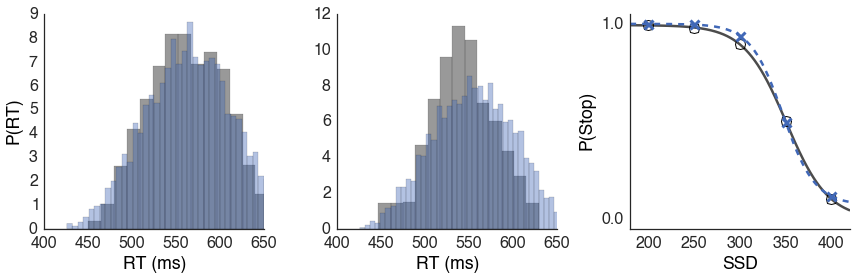

In [26]:
finfo1.to_csv('finfo.csv')
m.fits=np.tile(yh1,2).reshape(2,16)
m.popt=p1
vis.react_fit_plots(m, is_flat=True, save=True)

In [11]:
from radd.toolbox import analyze

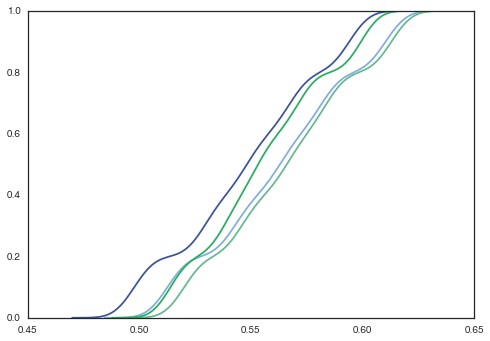

In [12]:
c1=bpal(2)
c2=gpal(2)
c=[c1,c2]
for i, yy in enumerate([m.avg_y[0], m.fits[0]]):
      kdeqc = analyze.kde_fit_quantiles(yy[6:11], bw=.01)
      sns.kdeplot(kdeqc, color=c[i][0], cumulative=True)
      kdeqe = analyze.kde_fit_quantiles(yy[11:], bw=.01)
      sns.kdeplot(kdeqe, color=c[i][1], cumulative=True)

      #kdeqc = analyze.kde_fit_quantiles(m.avg_y[0, 11:], bw=.01)